*First compiled: June 19, 2017.*

# Graph abstraction for simulated data

In [1]:
import numpy as np
from matplotlib import rcParams
import scanpy.api as sc
sc.settings.verbosity = 3                          # verbosity = 3: errors, warnings, info, hints
sc.settings.set_figure_params(dpi=80)              # low dots per inch yields small inline figures
sc.logging.print_version_and_date()

Running Scanpy version 0.2.8+14.gdc3fb50.dirty on 2017-09-15 07:53.


The notebooks contains the following sections.
* Section 1: [Simulated data for myeloid progenitor development](#data1)  
* Section 2: [Simulated data for different degrees of clustering](#data2)

## Simulated data for myeloid progenitor development <a id="data1"></a>

The simulated data describes development from a progenitor cell to four differentiated cell types: monocyte, erythrocyte, megacaryocyte and neutrophil.

In [6]:
fate_labels = {0: 'progenitor', 159: 'monocyte', 319: 'erythrocyte', 
               459: 'megacaryocyte', 619: 'neutrophil'}

See [Krumsiek *et al.* (2009)](https://doi.org/10.1371/journal.pone.0022649) for the definition of the boolean literature-curated network underlying the simulation and discussion of marker genes. The data has been generated using `sc.tl.sim('krumsiek11')`. We also add a bunch of clusters, sampled from a Gaussian mixed model, to the data.

In [7]:
adata_krumsiek11 = sc.examples.krumsiek11()
X_blobs = sc.examples.blobs(cluster_std=0.5, n_centers=2).X
X_concatenated = np.r_[adata_krumsiek11.X, X_blobs]
adata = sc.AnnData(X_concatenated)
adata.var_names = adata_krumsiek11.var_names
adata.add['iroot'] = 0
adata.add['highlights'] = fate_labels

reading file ./write/data/write/krumsiek11_sim/sim_000000.h5


### Visualization

computing tSNE
    using data matrix X directly (no PCA)
    using the "MulticoreTSNE" package by Ulyanov (2017)
    finished (0:00:02.883) and added
    "X_tsne", tSNE coordinates (adata.smp)


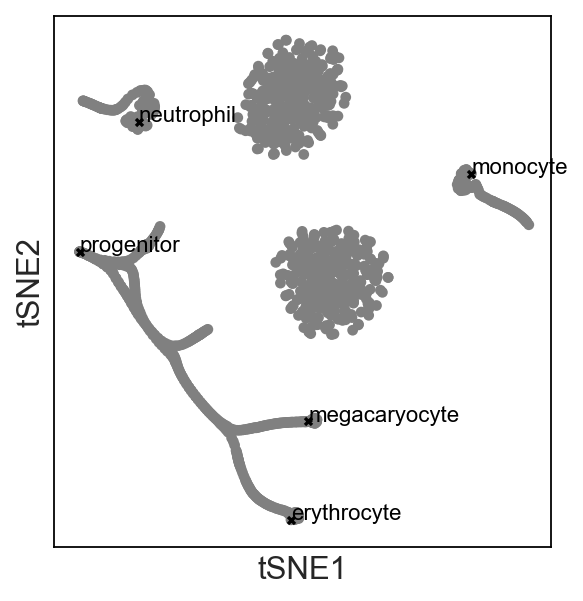

In [8]:
sc.tl.tsne(adata)
ax = sc.pl.tsne(adata)

drawing single-cell graph using layout "fr"
    using data matrix X directly for building graph (no PCA)
    computing data graph with n_neighbors = 30 
    computing spectral decomposition ("diffmap") with 15 components
    eigenvalues of transition matrix
    [ 1.            1.            1.            0.998418808   0.9969582558
      0.9920811653  0.9909049273  0.9824624062  0.9651805162  0.9614249468
      0.9520583153  0.9385528564  0.9172899127  0.9089726806  0.8958978653]
    finished (0:00:12.356) and added
    "X_draw_graph_fr", graph_drawing coordinates (adata.smp)
    "draw_graph_layout", the chosen layout (adata.add)


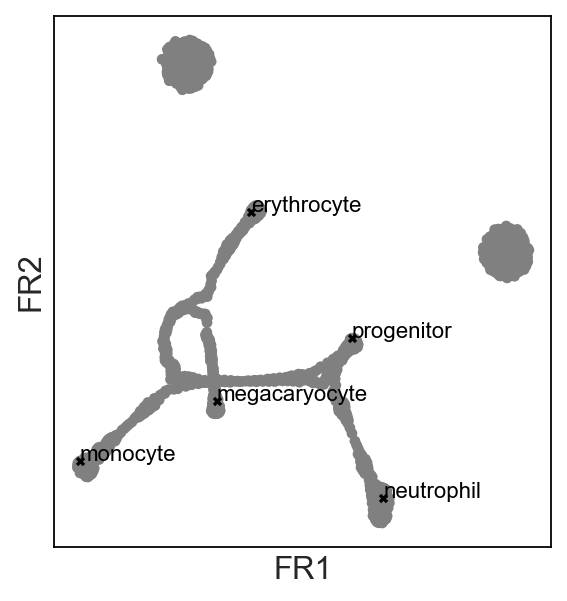

In [9]:
sc.tl.draw_graph(adata)
ax = sc.pl.draw_graph(adata)

In [10]:
sc.write('krumsiek11_blobs', adata)

writing ./write/krumsiek11_blobs.h5


### Construct the abstracted graph

In [13]:
adata = sc.read('krumsiek11_blobs')
sc.tl.aga(adata, resolution=2.5)

reading file ./write/krumsiek11_blobs.h5
running Louvain clustering
    using data matrix X directly for building graph (no PCA)
    using stored data graph with n_neighbors = 30 and spectrum
    [ 1.            1.            1.            0.998418808   0.9969582558
      0.9920811653  0.9909049273  0.9824624062  0.9651805162  0.9614249468]
    using the "louvain" package of Traag (2017)
    finished (0:00:00.214) and found 13 clusters, added
    "louvain_groups", the cluster labels (adata.smp)
    "louvain_groups_order", the unique cluster labels (adata.add)
running Approximate Graph Abstraction (AGA)
    using data matrix X directly for building graph (no PCA)
    using stored data graph with n_neighbors = 30 and spectrum
    [ 1.            1.            1.            0.998418808   0.9969582558
      0.9920811653  0.9909049273  0.9824624062  0.9651805162  0.9614249468]
    abstracted graph will have 13 nodes
... finished (0:00:00.337) --> added
    aga_adjacency_full_attachedness : 

... saving figure to file ./figs_krumsiek11_blobs/aga_draw_graph_fr.png


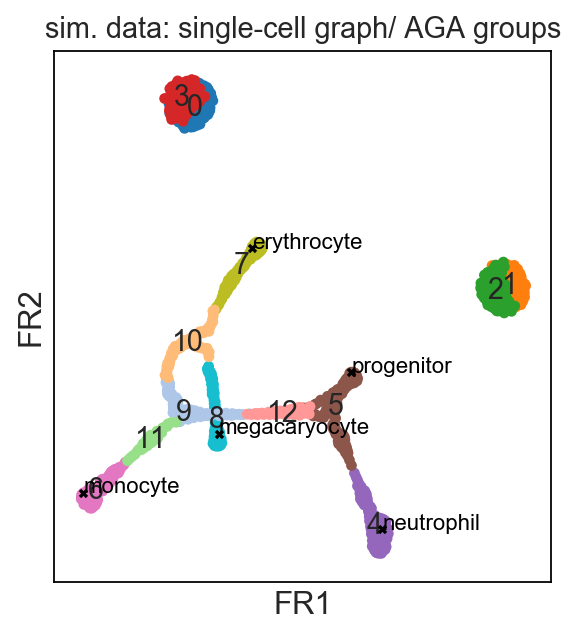

... saving figure to file ./figs_krumsiek11_blobs/aga_graph.png


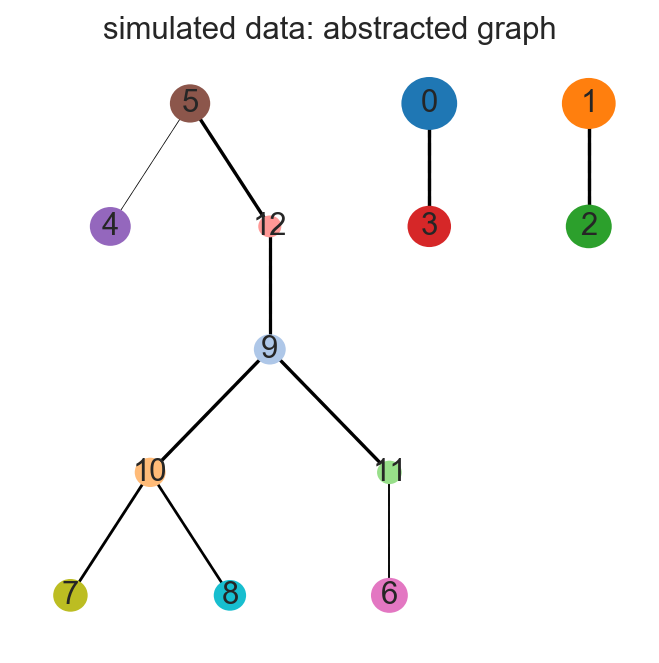

In [14]:
rcParams['axes.titlesize'] = 13
ax = sc.pl.aga_scatter(adata, basis='draw_graph_fr', legend_loc='on data', 
                       title='sim. data: single-cell graph/ AGA groups', save=True, show=True)
sc.pl.reset_rcParams()
ax = sc.pl.aga_graph(adata, root=['5', '0', '1'], save=True, layout='rt',
                     title='simulated data: abstracted graph', show=True)

Export this for external reusage.

In [ ]:
sc.write('krumsiek11_blobs', adata, ext='csv')

### Gene dynamics along paths

reading file ./write/krumsiek11_blobs.h5
... saving figure to file ../figs_krumsiek11_blobs/aga_path_erythrocytes.png


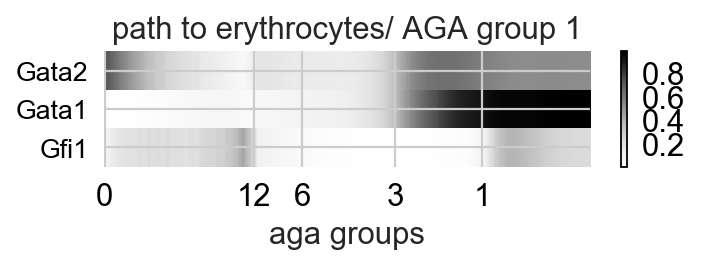

... saving figure to file ../figs_krumsiek11_blobs/aga_path_neutrophils.png


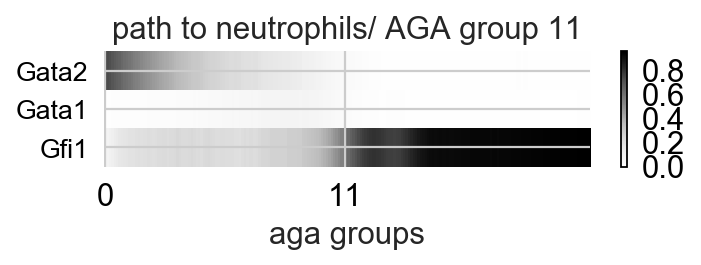

... saving figure to file ../figs_krumsiek11_blobs/aga_path_monocytes.png


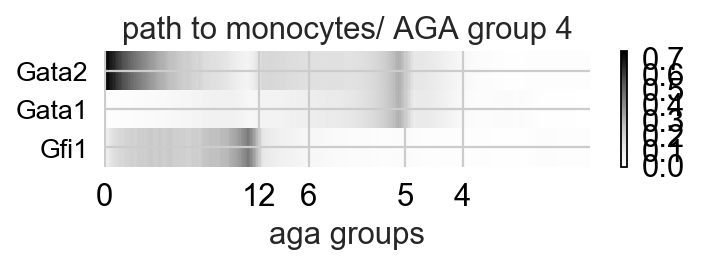

In [13]:
adata = sc.read('krumsiek11_blobs')
paths = [('erythrocytes', [0, 12, 6, 3, 1]),
         ('neutrophils', [0, 11]),
         ('monocytes', [0, 12, 6, 5, 4])]

rcParams['figure.figsize'] = (5, 1.2)
rcParams['figure.subplot.top'] = 0.8
rcParams['figure.subplot.bottom'] = 0.2
for ipath, (descr, path) in enumerate(paths):
    ax = sc.pl.aga_path(adata,
                        nodes=path,
                        keys=['Gata2', 'Gata1', 'Gfi1'],
                        n_avg=10,
                        ytick_fontsize=12,
                        title='path to ' + descr + '/ AGA group {}'.format(path[-1]),
                        save='_' + descr)
sc.pl.reset_rcparams()

## Simulated data for different degrees of clustering <a id="data2"></a>

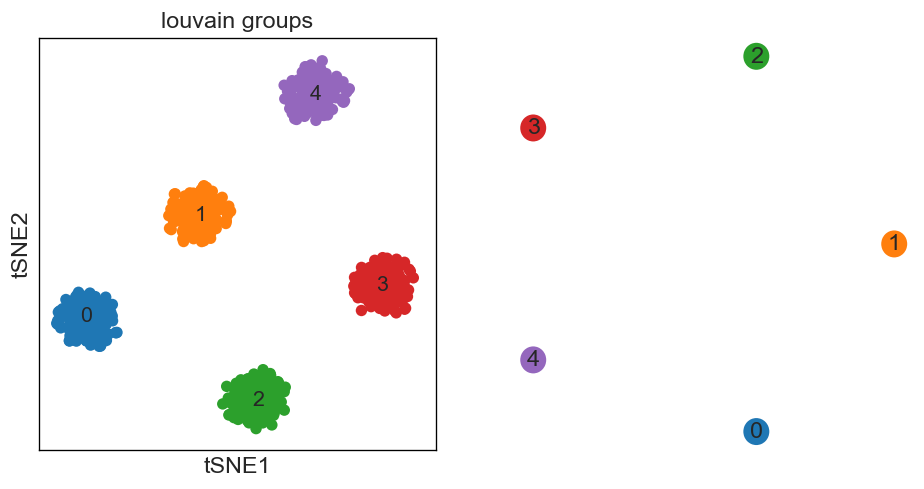

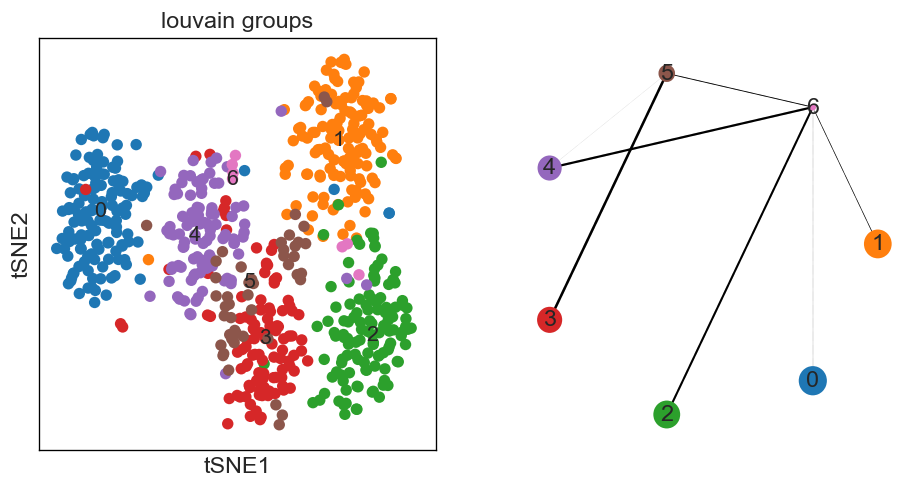

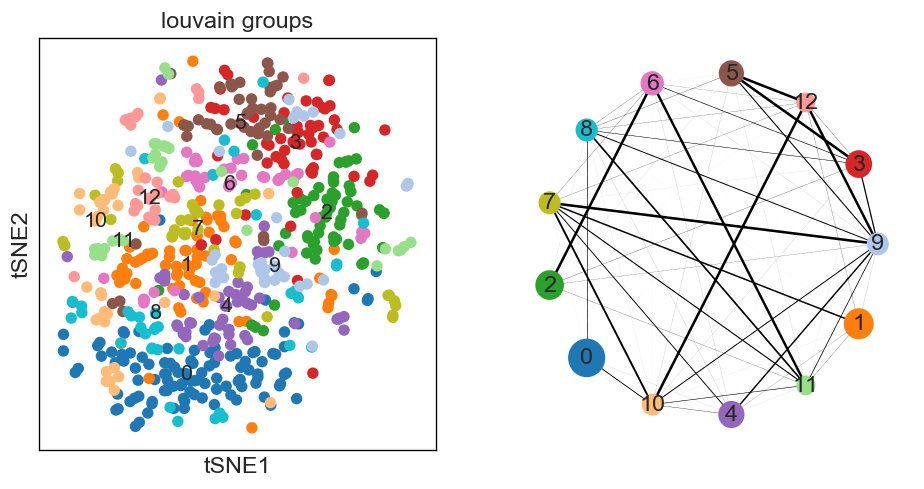

In [2]:
sc.settings.verbosity = 1
sc.settings.set_dpi(60)
for std in [1, 6, 10]:
    adata = sc.examples.blobs(cluster_std=std, n_centers=5)
    sc.tl.tsne(adata)
    sc.tl.aga(adata, n_neighbors=5, tree_based_confidence=False)
    sc.pl.aga(adata, solid_edges='aga_adjacency_full_confidence', layout='circle',
              save='_cluster_std{}'.format(std), show=True)